# Introductory data analysis for the Locust Hanger experiment
This notebook is intended to be an introductory data analysis for the November 2022 Locust experiment data

### Importing packages, loading data

In [45]:
# We start by importing all the necessary packages

import pandas as pd  #The main package we will be using for data analysis. Used to read CSVs/TSVs, work with dataframe objects, and many other things.
import matplotlib.pyplot as plt  #The standard plotting package, used for making nice pretty pictures.
import os  #We might need this to deal with filenames and paths.
import random  #Used to generate random numbers
import numpy as np  #We might need this, it's a pretty standard package. 
import seaborn as sns
from scipy import stats

import dataframe_image as dfi


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Put the location of the data folder on your computer
# Use the pre-cleaned data
data_location = 'D:/Data/Hangar-Locust/Cleaned/'
subfolder = 'cleaned_2K-locust_15112022/'

In [3]:
# Reads the .tsv file as a pandas DataFrame. We choose the Time column to be our index column. 
df = pd.read_csv(data_location + subfolder + 'cleaned_255_locust_11152022_0002.tsv', sep='\t', index_col='Time')

### Cleaning and augmenting data

In [4]:
# Print the first 10 rows of our dataframe. 
df.head(10)

,Frame,X.0,Y.0,Z.0,X.1,Y.1,Z.1,X.2,Y.2,Z.2,...,Z.476,X.477,Y.477,Z.477,X.478,Y.478,Z.478,X.479,Y.479,Z.479
Time,,,,,,,,,,,,,,,,,,,,,
0.00,1,574.717,10.413,50.306,1080.795,2044.258,29.448,1845.383,2161.554,40.285,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,2,574.718,10.417,50.309,1080.803,2044.257,29.436,1845.387,2161.551,40.295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.02,3,574.719,10.417,50.311,1080.809,2044.250,29.422,1845.392,2161.554,40.301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.03,4,574.722,10.418,50.298,1080.872,2044.267,29.224,1845.389,2161.559,40.302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.04,5,574.737,10.439,50.357,1080.835,2044.133,29.011,1845.417,2161.662,39.977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,6,574.748,10.487,50.401,1080.822,2044.125,28.992,1845.420,2161.669,39.910,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.06,7,574.757,10.508,50.427,1080.838,2044.122,28.976,1845.417,2161.668,39.873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.07,8,574.761,10.522,50.445,1080.830,2044.123,28.958,1845.414,2161.671,39.898,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.08,9,574.760,10.521,50.444,1080.844,2044.125,28.953,1845.420,2161.665,39.899,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# We can access the columns of the dataframe by using df.columns. We see that there are 799 columns.
df.columns

Index(['Frame', 'X.0', 'Y.0', 'Z.0', 'X.1', 'Y.1', 'Z.1', 'X.2', 'Y.2', 'Z.2',
       ...
       'Z.476', 'X.477', 'Y.477', 'Z.477', 'X.478', 'Y.478', 'Z.478', 'X.479',
       'Y.479', 'Z.479'],
      dtype='object', length=1000)

In [6]:
# The command df.info() gives us some useful information about how the dataframe is stored
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Float64Index: 60000 entries, 0.0 to 599.99
Columns: 1000 entries, Frame to Z.479
dtypes: float64(999), int64(1)
memory usage: 458.2 MB
None


### Obtaining the metadata

In [7]:
# This cell computes various important metadata we might be interested in later, such as framerates, total length of video, etc

#Calculates the first, last, and total number of frames
firstframe = df['Frame'].min()
lastframe = df['Frame'].max()
totalframes = lastframe - firstframe

firsttime = df['Frame'].idxmin()
lasttime = df['Frame'].idxmax()


#Calculates the time difference (remember time is the index in our dataframe) between two consecutive frames. This is the duration of a single frame in seconds
frameduration = df.query('Frame == 2').index.tolist()[0] - df.query('Frame == 1').index.tolist()[0]

#Calculates the framerate, in frames per second
framerate = 1/frameduration

#Calculates the total length of the video in seconds
videolength = totalframes*frameduration

### Finding out which of the numbered markers are arena markers and which are locust markers

In [8]:
# It will be useful later to have lists detailing which of the numbered markers are locust markers and which are arena markers


# We begin by getting a list of all the numbered markers
all_markers = [int(cols[2:]) for cols in df.columns[1:]]

# Since each number appears in the list three times, it's certainly not a unique list of numbers. 
# We can make it into a unique list of numbers though, by first converting to a set, and then back to a list.
all_markers = list(set(all_markers))

# Unfortunately this loses the nice ordering we had, but we can fix that easily enough with a quick sort.
all_markers = sorted(all_markers)

nummarkers = len(all_markers)

In [9]:
# Define subsets of the marker labels corresponding to the x, y, and z coordinates, as well as speed
X_subset = [f'X.{label}' for label in all_markers]
Y_subset = [f'Y.{label}' for label in all_markers]
Z_subset = [f'Z.{label}' for label in all_markers]


The next cell computes which of the markers are the labels marking the arena. We first restrict ourselves to only looking at the Z components of the dataframe, and then choose the columns of the dataframe in which every element is above 350 using 
```
df[Z_subset].loc[:, (df[Z_subset] > 350).all()]
```
We then chain this with the ```columns``` and ```tolist``` methods, inside a list comprehension, to build the required list of marker numbers.

In [10]:
# Calculate which markers are the ones marking the arena (there should be 10)
arena_markers = [int(item[2:]) for item in df[Z_subset].loc[:, (df[Z_subset] > 350).all()].columns.tolist()]
print('The arena marker labels are:')
print(arena_markers)

The arena marker labels are:
[5, 6, 14, 18, 31, 32, 88, 100, 160, 225]


In [11]:
# We also want a way of knowing which columns correspond to the L markers (there should be 4)
# We follow the same procedure as above, but now select the markers by the condition that y < 500.
L_markers = [int(item[2:]) for item in df[Y_subset].loc[:, (df[Y_subset] < 500).all()].columns.tolist()]
print('The L marker labels are:')
print(L_markers)

The L marker labels are:
[0, 12, 30, 35]


In [12]:
# Finally, for completeness let us define the locust markers as the markers which aren't the arena markers or the L markers
locust_markers = np.setdiff1d(all_markers, arena_markers + L_markers).tolist()
print('The remaining labels are all locust labels. There are ' + str(len(locust_markers)) + ' locust labels.')

The remaining labels are all locust labels. There are 319 locust labels.


In [13]:
# We will create a new dataframe where we have removed the arena markers, which will save us a bit of headache later.
ldf = df.copy()
ldf.drop([f'X.{label}' for label in arena_markers+L_markers], axis=1, inplace=True)
ldf.drop([f'Y.{label}' for label in arena_markers+L_markers], axis=1, inplace=True)
ldf.drop([f'Z.{label}' for label in arena_markers+L_markers], axis=1, inplace=True)

In [14]:
# We can get some max and min values which will also be useful for plotting later
ldf.drop('Frame', axis=1)



X_subset = [f'X.{label}' for label in locust_markers]
Y_subset = [f'Y.{label}' for label in locust_markers]
Z_subset = [f'Z.{label}' for label in locust_markers]


xmin = np.nanmin(ldf[X_subset].iloc[:, :].values)
xmax = np.nanmax(ldf[X_subset].iloc[:, :].values)
ymin = np.nanmin(ldf[Y_subset].iloc[:, :].values)
ymax = np.nanmax(ldf[Y_subset].iloc[:, :].values)
zmin = np.nanmin(ldf[Z_subset].iloc[:, :].values)
zmax = np.nanmax(ldf[Z_subset].iloc[:, :].values)


In [15]:
print('The minimum x value is ' + str(xmin))
print('The maximum x value is ' + str(xmax))
print('The minimum y value is ' + str(ymin))
print('The maximum y value is ' + str(ymax))
print('The minimum z value is ' + str(zmin))
print('The maximum z value is ' + str(ymax))

The minimum x value is 60.573
The maximum x value is 1964.361
The minimum y value is 1209.351
The maximum y value is 3086.591
The minimum z value is 2.296
The maximum z value is 3086.591


### Calculating velocities

In [16]:
# We now calculate the velocities (vx, vy, vz) of the locusts. This involves taking differences between the positions of the locusts in consecutive frames.

# This will generate a bunch of warnings, probably because this is not the 'best' way to do it. Still, it works, so we won't stress too much. 
# If you want to see all the warnings for some reason, uncomment the warnings part of the import cell and run the notebook again.

for locust in locust_markers:
#    ldf[f'V{col}'] = ldf[col].shift(-1) - ldf[col]    #Simple shift
#    ldf[f'V{col}'] = 1/2*(ldf[col].shift(-1) - ldf[col].shift(+1))    #Average over 2 simple shifts
    ldf[f'VX.{locust}'] = 1/20*(ldf[f'X.{locust}'].shift(-10) - ldf[f'X.{locust}'].shift(+10))    #Average over 20 simple shifts
    ldf[f'VY.{locust}'] = 1/20*(ldf[f'Y.{locust}'].shift(-10) - ldf[f'Y.{locust}'].shift(+10))    #Average over 20 simple shifts
    ldf[f'VZ.{locust}'] = 1/20*(ldf[f'Z.{locust}'].shift(-10) - ldf[f'Z.{locust}'].shift(+10))    #Average over 20 simple shifts


In [17]:
# We want to see the speeds of the locusts as well. Let's add a new column containing the speed for each locust 
for locust in locust_markers:
    ldf[f'speed.{locust}'] = np.sqrt((ldf[f'VX.{locust}'])**2 + (ldf[f'VY.{locust}'])**2 + (ldf[f'VZ.{locust}'])**2)

In [18]:
# Since we averaged over the previous 10 and following 10 frames to calculate the velocities, the first and last frames will give us nonsense velocities. We will simply drop them
ldf.drop(ldf.head(12).index,inplace=True)
ldf.drop(ldf.tail(12).index,inplace=True)

In [19]:
# The tracking is not great. On average, each of the labels is missing data for a lot of the dataset
print('On average, the labels are missing data for this percentage of the dataset:')
print((ldf.isnull().sum()/len(df)).mean()*100)

On average, the labels are missing data for this percentage of the dataset:
12.798275887794688


In [20]:
# We also want to know which are the dead locusts. We do this by finding the markers which have very low average speed.
# Restrict to looking at only the speed components of the dataframe
speed_subset = [f'speed.{label}' for label in locust_markers]
dead_locusts = [int(item[6:]) for item in ldf[speed_subset].loc[:, (ldf[speed_subset].mean()<0.1)].columns.tolist()]

ldf.drop([f'X.{label}' for label in dead_locusts], axis=1, inplace=True)
ldf.drop([f'Y.{label}' for label in dead_locusts], axis=1, inplace=True)
ldf.drop([f'Z.{label}' for label in dead_locusts], axis=1, inplace=True)
ldf.drop([f'VX.{label}' for label in dead_locusts], axis=1, inplace=True)
ldf.drop([f'VY.{label}' for label in dead_locusts], axis=1, inplace=True)
ldf.drop([f'VZ.{label}' for label in dead_locusts], axis=1, inplace=True)
ldf.drop([f'speed.{label}' for label in dead_locusts], axis=1, inplace=True)



locust_markers = np.setdiff1d(locust_markers, dead_locusts).tolist()


In [21]:
print(len(dead_locusts))

20


In [22]:
# We can select a subset of locusts which are tracked for the majority of the time
maj_ldf = ldf.iloc[:, (ldf.isnull().sum()/len(df) < 0.15).tolist()].copy()

In [23]:
# We can get the marker labels for these locusts
maj_markers = [int(cols[6:]) for cols in maj_ldf.columns[1:] if 'speed.' in cols]
# Since each number appears in the list three times, it's certainly not a unique list of numbers. 
# We can make it into a unique list of numbers though, by first converting to a set, and then back to a list.
maj_markers = list(set(maj_markers))

# Unfortunately this loses the nice ordering we had, but we can fix that easily enough with a quick sort.
maj_markers = sorted(maj_markers)



In [24]:
# Because there are so many markers, it's difficult to see what's going on if we try to print ndf.head(10)
# Instead, let's just pick one marker, and look at the columns we have available.
# We have: Frame, x position, y position, z position, x velocity, y velocity, z velocity, speed.
LocustNumber = random.choice(maj_markers)
ldf[['Frame', f'X.{LocustNumber}', f'Y.{LocustNumber}', f'Z.{LocustNumber}', f'VX.{LocustNumber}', f'VY.{LocustNumber}', f'VZ.{LocustNumber}', f'speed.{LocustNumber}']].head(10)

,Frame,X.55,Y.55,Z.55,VX.55,VY.55,VZ.55,speed.55
Time,,,,,,,,
0.12,13,1738.780,1566.076,35.874,0.01285,-0.04580,-0.06955,0.084261
0.13,14,1738.769,1566.079,35.787,0.01340,-0.04900,-0.05595,0.075571
0.14,15,1738.799,1566.032,35.705,0.00480,-0.02960,-0.02075,0.036466
0.15,16,1738.732,1566.004,35.761,0.01230,-0.03445,-0.01180,0.038436
0.16,17,1738.724,1565.986,35.756,0.02330,-0.04155,-0.00895,0.048471
0.17,18,1738.604,1565.973,35.751,0.02965,-0.04455,-0.00895,0.054258
0.18,19,1738.486,1565.994,35.655,0.02625,-0.04650,-0.00160,0.053422
0.19,20,1738.386,1565.990,35.578,0.02525,-0.05175,-0.00605,0.057898
0.20,21,1738.332,1565.977,35.630,0.01310,-0.05745,0.00010,0.058925


## Visualising the data

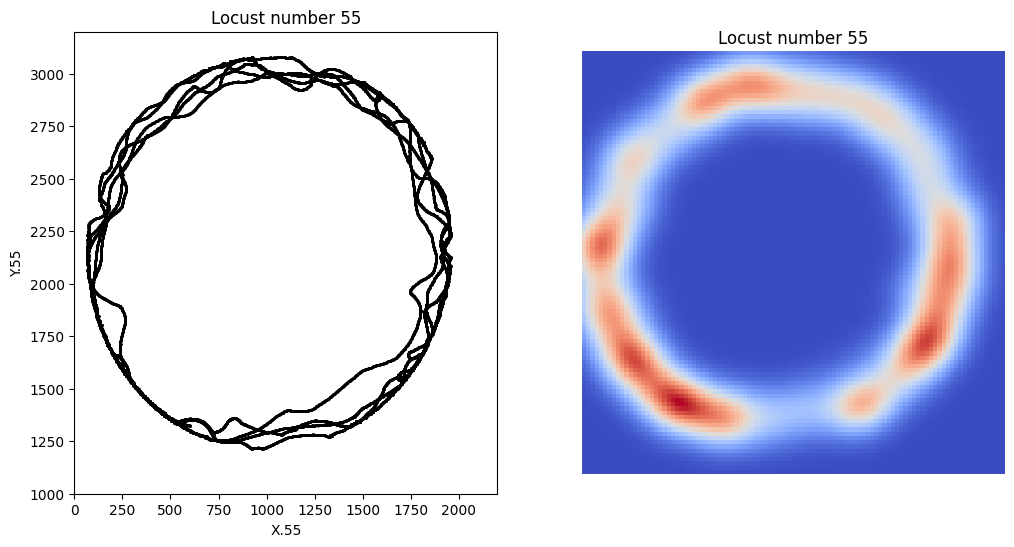

CPU times: total: 19.3 s
Wall time: 19.4 s


In [44]:
%%time
# Let's plot the trajectory of a random locust. 

# First, let's set up some reasonable min and max values for the x and y axes.
xmin = 0
xmax = 2200
ymin = 1000
ymax = 3200


# Let us choose which part of the dataframe we are actually interested in plotting. 
# We will take only the part of ndf containing the columns corresponing to 'X.LocustNumber', 'Y.LocustNumber', 'Z.LocustNumber', and call this new dataframe plot_df
plot_df = ldf[[f'X.{LocustNumber}', f'Y.{LocustNumber}', f'Z.{LocustNumber}']].copy()


# Each matplotlib plot needs a fig and an ax.
fig = plt.figure(figsize=(12,6))

# This begins the first plot
ax = plt.subplot(121)

# Now that we have the dataframe we are interested in plotting, we can make a scatter plot of it from the following command. 
plot_df.plot.scatter(x=f'X.{LocustNumber}', y=f'Y.{LocustNumber}', c='Black', s=0.5, ax=ax )
ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.set_title(str("Locust number " + str(LocustNumber)))



# This begins the second plot
ax = plt.subplot(122)

datax = plot_df[f'X.{LocustNumber}'].dropna()
datay = plot_df[f'Y.{LocustNumber}'].dropna()
values = np.vstack((datax, datay))
kernel = stats.gaussian_kde(values)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)

ax.imshow(np.rot90(Z), cmap = sns.color_palette("coolwarm", as_cmap=True),
          extent=[xmin, xmax, ymin, ymax])


ax.set_title(str("Locust number " + str(LocustNumber)))
plt.axis('off')


#plt.savefig('55.png')
plt.show()


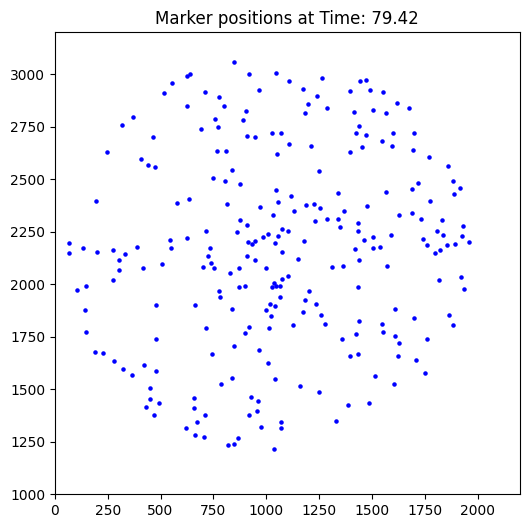

In [57]:
# What about all of the locusts at a given time?
# First, choose a time
RandomTime = round(random.uniform(0, max(ldf.index)),2)


X_subset = [f'X.{label}' for label in locust_markers]
Y_subset = [f'Y.{label}' for label in locust_markers]
Z_subset = [f'Z.{label}' for label in locust_markers]
X_frame_df = ldf.loc[RandomTime][X_subset].dropna()
Y_frame_df = ldf.loc[RandomTime][Y_subset].dropna()
Z_frame_df = ldf.loc[RandomTime][Z_subset].dropna()

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)

plt.scatter(X_frame_df, Y_frame_df, s=5, color='blue')

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)

plt.title(f'Marker positions at Time: {RandomTime}')

#plt.savefig('randomtime.png')
plt.show()

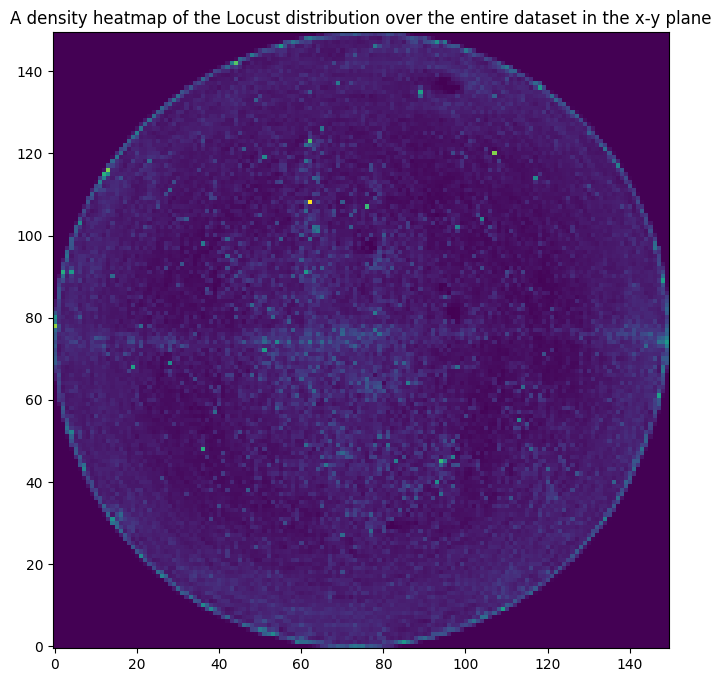

In [59]:
# Let's see a density heatmap of the locusts in the arena.

X_df = ldf[X_subset].to_numpy()
Y_df = ldf[Y_subset].to_numpy()
Z_df = ldf[Z_subset].to_numpy()




heatmap, xedges, yedges = np.histogram2d(X_df[~np.isnan(X_df)], Y_df[~np.isnan(Y_df)], bins=150)


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)




plt.title('A density heatmap of the Locust distribution over the entire dataset in the x-y plane')
plt.imshow(heatmap.T, origin='lower')
#plt.savefig('heatmap.png')
plt.show()

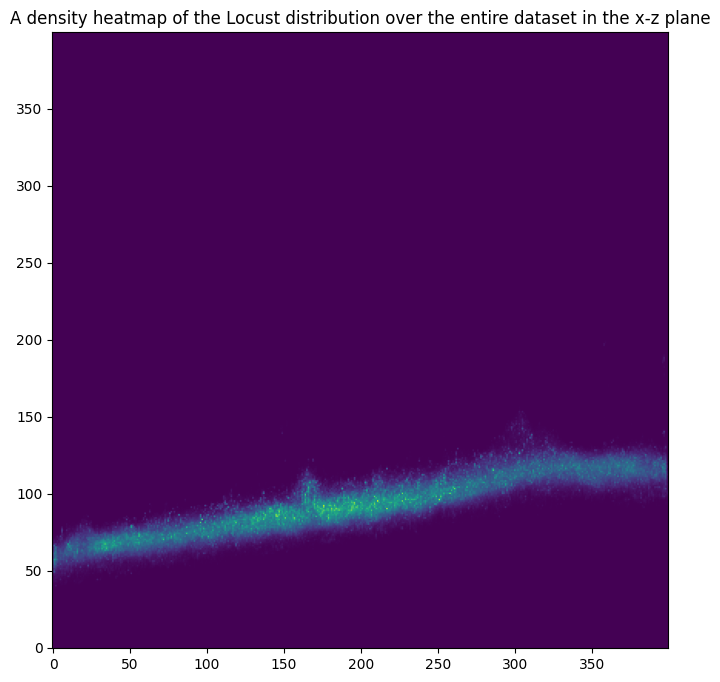

In [60]:
heatmap, xedges, yedges = np.histogram2d(X_df[~np.isnan(X_df)], Z_df[~np.isnan(Y_df)], bins=400)


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)




plt.title('A density heatmap of the Locust distribution over the entire dataset in the x-z plane')
plt.imshow(heatmap.T, origin='lower')
#plt.savefig('xz.png')
plt.show()

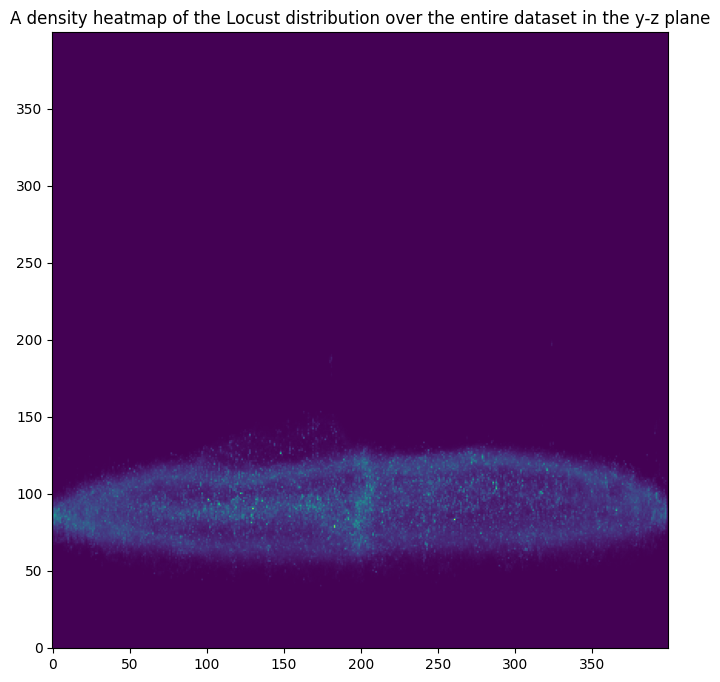

In [61]:
heatmap, xedges, yedges = np.histogram2d(Y_df[~np.isnan(Y_df)], Z_df[~np.isnan(Y_df)], bins=400)


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)




plt.title('A density heatmap of the Locust distribution over the entire dataset in the y-z plane')
plt.imshow(heatmap.T, origin='lower')
#plt.savefig('yz.png')
plt.show()

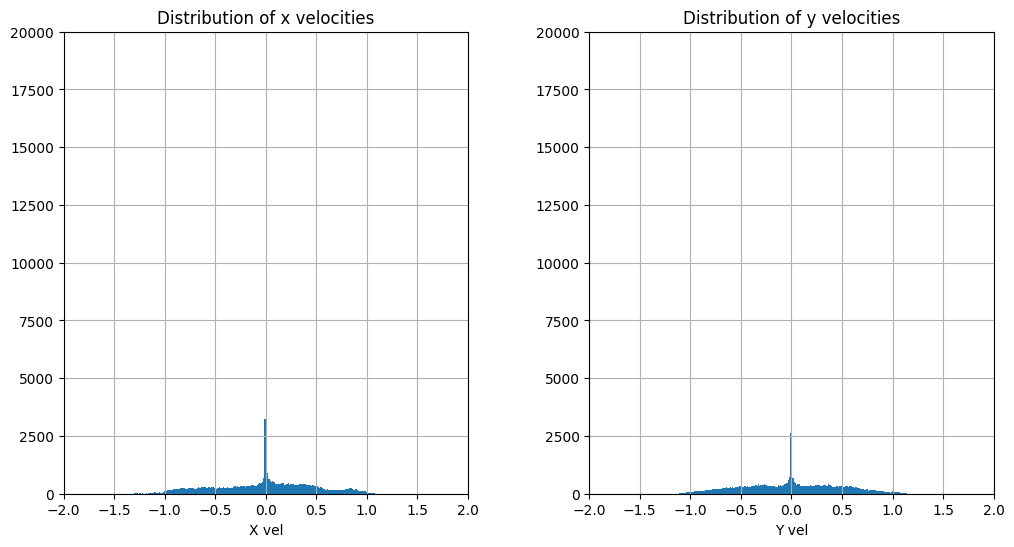

In [30]:
# Let's graph the distribution of the x and y velocities now. We will start with just a single locust, and then graph the distribution for all the locusts. 

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)

ax.set_xlabel('X vel')
ldf.hist(ax = ax, column=f'VX.{LocustNumber}', bins=200)
plt.title('Distribution of x velocities')
ax.set_xlim((-2,2))
ax.set_ylim((0,20000))


ax = plt.subplot(122)

ax.set_xlabel('Y vel')

ldf.hist(ax = ax, column=f'VY.{LocustNumber}', bins=200)
plt.title('Distribution of y velocities')
ax.set_xlim((-2,2))
ax.set_ylim((0,20000))

plt.show()

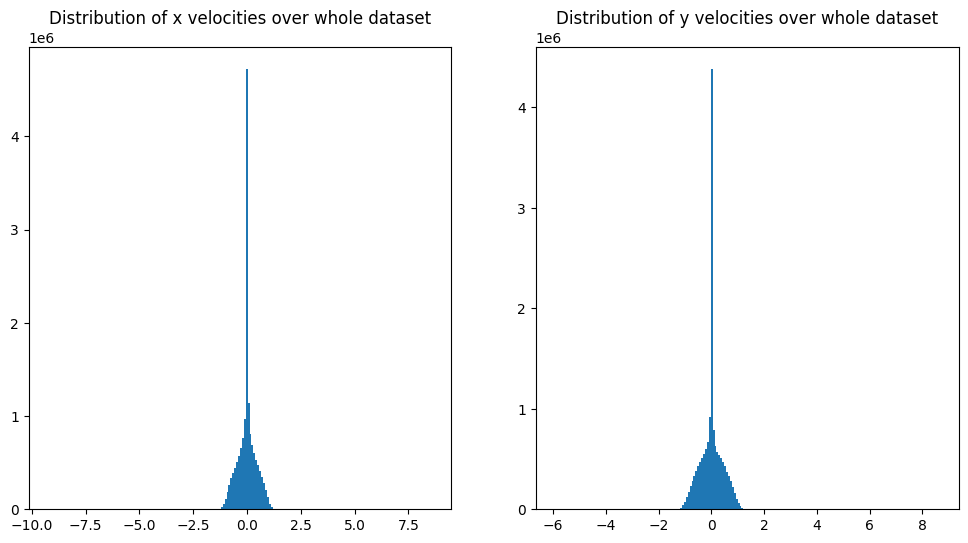

In [31]:
# We can similarly calculate the distributions over the entire dataset, rather than just one locust.
x_vel_df = ldf[[f'VX.{label}' for label in locust_markers]]
y_vel_df = ldf[[f'VY.{label}' for label in locust_markers]]

fig = plt.figure(figsize=(12,6))
ax = plt.subplot(121)
plt.title('Distribution of x velocities over whole dataset')


plt.hist(x_vel_df.to_numpy().flatten(), bins=200)


ax = plt.subplot(122)
plt.hist(y_vel_df.to_numpy().flatten(), bins=200)
plt.title('Distribution of y velocities over whole dataset')

plt.show()

In [32]:
# The distribution is heavily peaked at zero, suggesting perhaps that most of the markers spend their time stationary. 

In [33]:
# Let us now look at the distribution of speeds

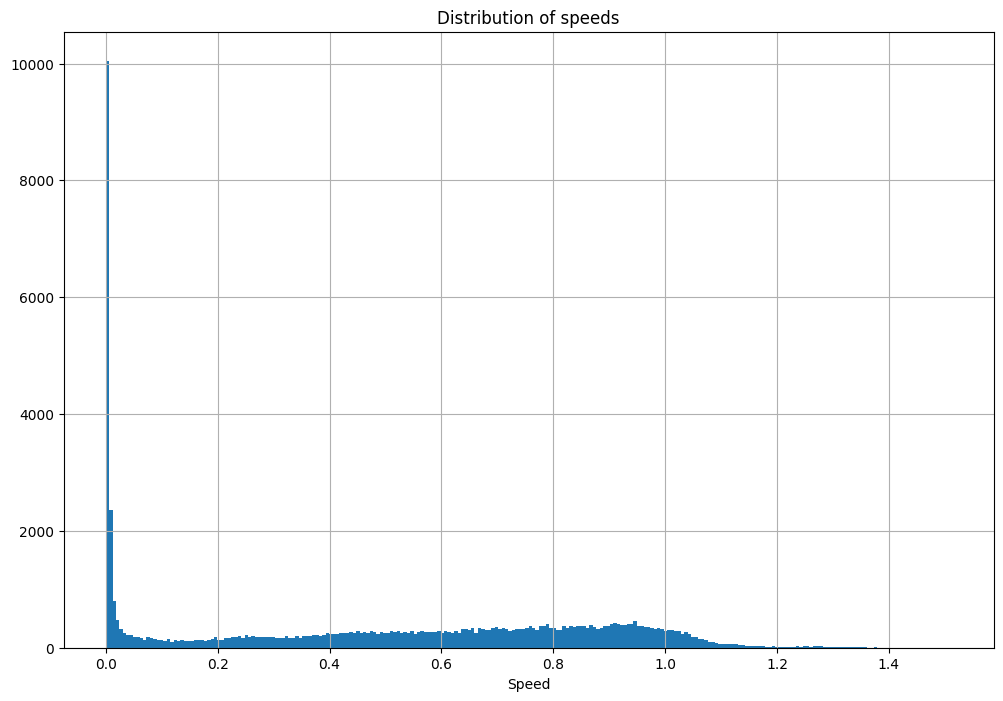

In [34]:
# For a single locust, we have
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('Speed')

ldf.hist(ax = ax, column=f'speed.{LocustNumber}', bins=250)




plt.title('Distribution of speeds')
plt.show()

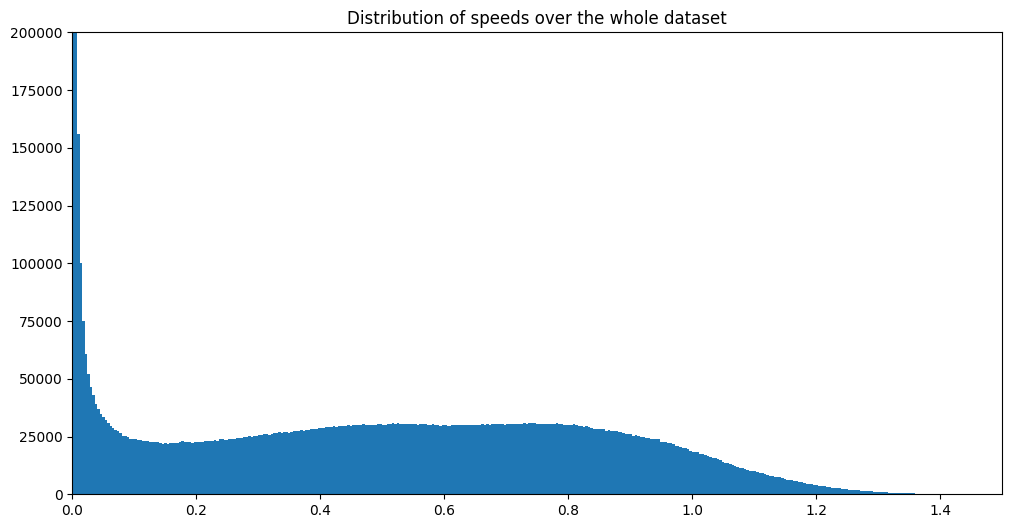

In [85]:
# For the entire dataset
speed_df = ldf[[f'speed.{label}' for label in locust_markers]]

# Filter out unrealistic speeds
speed_df = speed_df.loc[:, (speed_df < 2 ).all()]



fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)

plt.hist(speed_df.to_numpy().flatten(), bins=500)
plt.title('Distribution of speeds over the whole dataset')

ax.set_xlim((0,1.5))
ax.set_ylim((0,200000))
#plt.savefig('speeds.png')
plt.show()

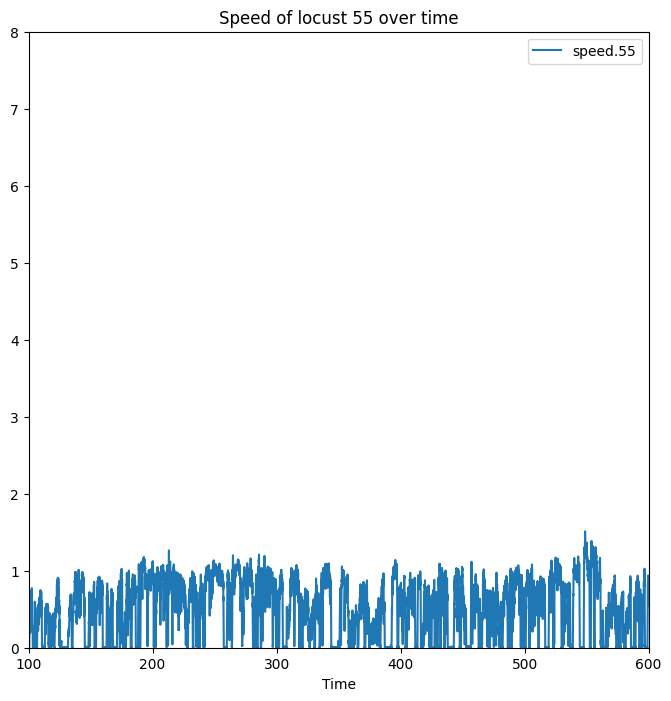

In [36]:
# Let's finally take a look at how the speed of a locust varies over time
# We will use the same locust from before, LocustNumber. We can use the speed_df dataframe we defined for the previous calculations

fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = f'speed.{LocustNumber}', use_index=True, ax=ax)
plt.title(f'Speed of locust {LocustNumber} over time')

ax.set_xlim((100,600))
ax.set_ylim((0,8))


plt.show()

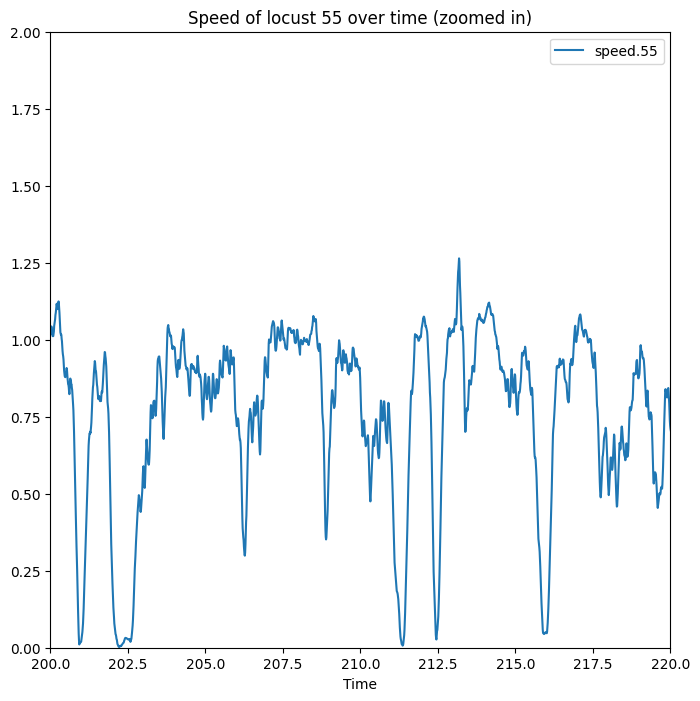

In [87]:
# Zooming in a bit, we see that the speed is quite messy

fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = f'speed.{LocustNumber}', use_index=True, ax = ax)

plt.title(f'Speed of locust {LocustNumber} over time (zoomed in)')
ax.set_xlim(200,220)
ax.set_ylim(0,2)

plt.show()

In [88]:
# How about the average speed of the locusts over time? Does that look smoother?
# We can calculate the average speed easily by adding a new column to the speed_df dataframe
speed_df = ldf[[f'speed.{label}' for label in locust_markers]].copy()
speed_df['mean'] = speed_df.mean(axis=1)
speed_df['median'] = speed_df.median(axis=1)


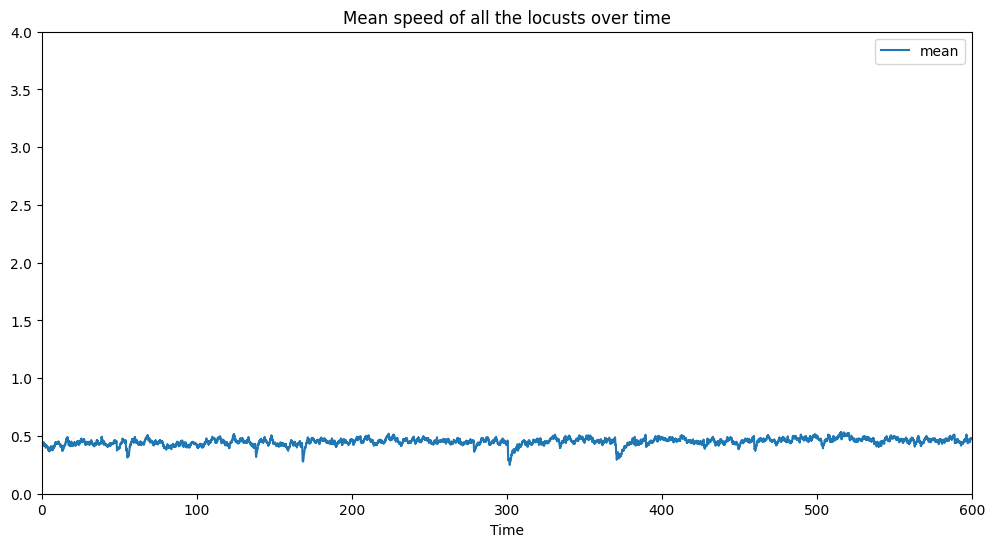

In [90]:
# The graph of the mean looks already a bit smoother
fig, ax = plt.subplots()
fig.set_size_inches(12,6)


speed_df.plot(y = 'mean', use_index=True, ax=ax)
plt.title('Mean speed of all the locusts over time')

ax.set_ylim((0,4))
ax.set_xlim((0,600))

plt.savefig("meanspeed.jpg")
plt.show()

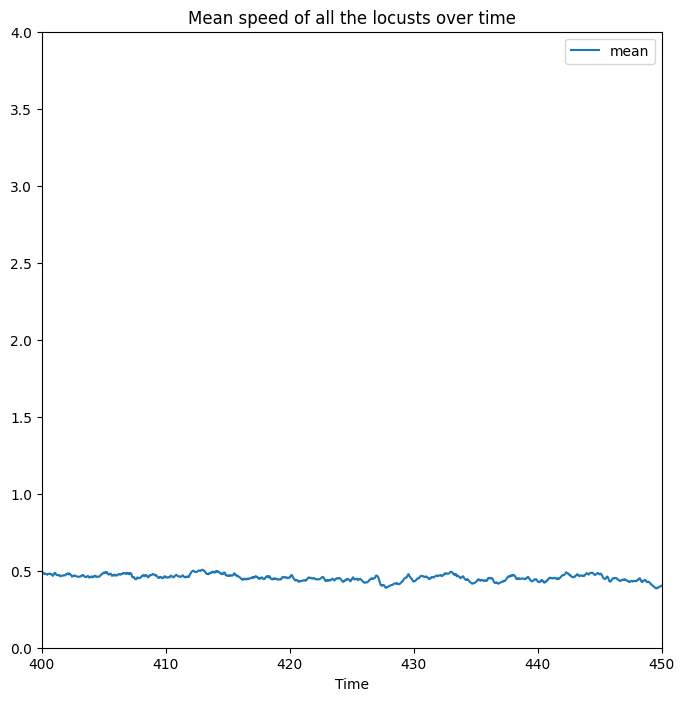

In [40]:
# Zooming in on a small section, we see
fig, ax = plt.subplots()
fig.set_size_inches(8,8)


speed_df.plot(y = 'mean', use_index=True, ax=ax)
plt.title('Mean speed of all the locusts over time')

ax.set_ylim((0,4))
ax.set_xlim((400, 450))

#fig.savefig("meanspeedb.jpg")
plt.show()

### Jumping

<AxesSubplot: xlabel='Time'>

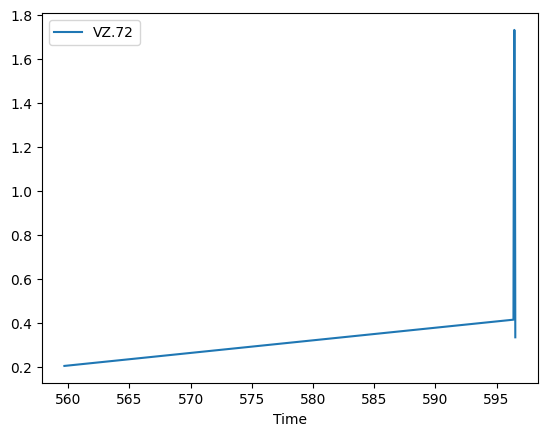

In [155]:
# We want to identify when the locusts are jumping. We will naively try to find them by looking for moments when the z velocity is high
# We begin with 1 locust


VZ_subset = [f'VZ.{label}' for label in [72]]

ldf[VZ_subset][ldf[VZ_subset] > 0.2].dropna().plot()

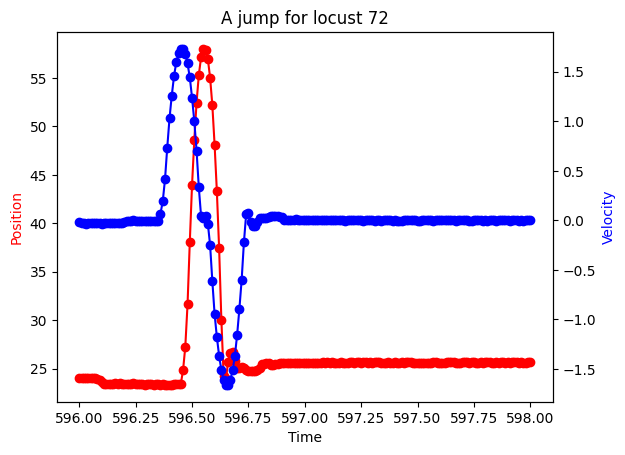

In [159]:
plt.figure();


ax = ldf[f'Z.{72}'][596:598].plot(c='red', style='-o')
#ax.set_ylim(20,45)

ldf[f'VZ.{72}'][596:598].plot(c='blue',style='-o', secondary_y=True)



ax.set_ylabel('Position', color='red')
ax.right_ax.set_ylabel('Velocity', color='blue')

plt.title('A jump for locust 72')

plt.savefig('jump.png')
plt.show()

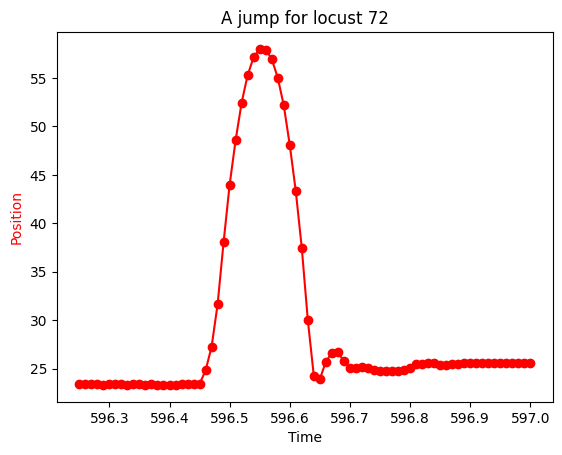

In [162]:
plt.figure();


ax = ldf[f'Z.{72}'][596.25:597].plot(c='red', style='-o')
#ax.set_ylim(20,45)

#ldf[f'VZ.{72}'][596.25:597].plot(c='blue',style='-o', secondary_y=True)



ax.set_ylabel('Position', color='red')
#ax.right_ax.set_ylabel('Velocity', color='blue')

plt.title('A jump for locust 72')

plt.savefig('jump2.png')
plt.show()